In [1]:
# first set up the Apache Spark environment to perform Big Data Task
!clear
!echo welcome

!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz

welcome
--2023-05-26 00:09:56--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  17.5MB/s    in 76s     

2023-05-26 00:11:12 (3.78 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]



In [2]:
# install findspark
!pip3 install findspark
# initialize spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
# "SparkSession" and "sc" are are key handles in to Spark API
SparkSession.builder.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# get file from the UK police open data and unzip the file
!wget https://data.police.uk/data/archive/2014-12.zip
!unzip 2014-12.zip


--2023-05-26 00:11:51--  https://data.police.uk/data/archive/2014-12.zip
Resolving data.police.uk (data.police.uk)... 54.220.140.16, 3.248.167.75
Connecting to data.police.uk (data.police.uk)|54.220.140.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://policeuk-data.s3.amazonaws.com/archive/2014-12.zip [following]
--2023-05-26 00:11:52--  https://policeuk-data.s3.amazonaws.com/archive/2014-12.zip
Resolving policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)... 52.218.28.138, 52.92.34.137, 52.218.117.201, ...
Connecting to policeuk-data.s3.amazonaws.com (policeuk-data.s3.amazonaws.com)|52.218.28.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1391051759 (1.3G) [binary/octet-stream]
Saving to: ‘2014-12.zip’

2014-12.zip         100%[===================>]   1.29G  14.6MB/s    in 72s     

2023-05-26 00:13:05 (18.4 MB/s) - ‘2014-12.zip’ saved [1391051759/1391051759]

Archive:  2014-12.zip
  inflating: 2010-12

In [5]:
# set up the Spark environment with the Sparksession object named spark and application name cities
spark = SparkSession.builder.appName("cities").getOrCreate()

#### Get the files for the month of December 

In [6]:
file1="./2014-12/2014-12-sussex-street*csv"
file2="./2014-12/2014-12-warwickshire-street*csv"
file3="./2014-12/2014-12-west-midlands-street*csv"
file4="./2014-12/2014-12-west-yorkshire-street*csv"
file5="./2014-12/2014-12-avon-and-somerset-street*csv"
file6="./2014-12/2014-12-bedfordshire-street*csv"
file7="./2014-12/2014-12-btp-street*csv"
file8="./2014-12/2014-12-cambridgeshire-street*csv"
file9="./2014-12/2014-12-cheshire-street*csv"
file10="./2014-12/2014-12-city-of-london-street*csv"
file11="./2014-12/2014-12-cleveland-street*csv"
file12="./2014-12/2014-12-cumbria-street*csv"
file13="./2014-12/2014-12-derbyshire-street*csv"
file14="./2014-12/2014-12-greater-manchester-street*csv"
file15="./2014-12/2014-12-devon-and-cornwall-street*csv"
file16="./2014-12/2014-12-dorset-street.csv"
file17="./2014-12/2014-12-durham-street.csv"
file18="./2014-12/2014-12-dyfed-powys-street.csv"
file19="./2014-12/2014-12-essex-street.csv"
file20="./2014-12/2014-12-gloucestershire-street.csv"
file21="./2014-12/2014-12-gwent-street.csv"
file22="./2014-12/2014-12-hampshire-street.csv"
file23="./2014-12/2014-12-hertfordshire-street.csv"
file24="./2014-12/2014-12-humberside-street.csv"
file25="./2014-12/2014-12-kent-street.csv"
file26="./2014-12/2014-12-lancashire-street.csv"
file45="./2014-12/2014-12-leicestershire-street.csv"
file27="./2014-12/2014-12-lincolnshire-street.csv"
file28="./2014-12/2014-12-merseyside-street.csv"
file29="./2014-12/2014-12-metropolitan-street.csv"
file30="./2014-12/2014-12-norfolk-street.csv"
file31="./2014-12/2014-12-north-wales-street.csv"
file32="./2014-12/2014-12-north-yorkshire-street.csv"
file33="./2014-12/2014-12-northamptonshire-street.csv"
file34="./2014-12/2014-12-northumbria-street.csv"
file35="./2014-12/2014-12-nottinghamshire-street.csv"
file36="./2014-12/2014-12-northern-ireland-street.csv"
file37="./2014-12/2014-12-south-wales-street.csv"
file38="./2014-12/2014-12-south-yorkshire-street.csv"
file39="./2014-12/2014-12-staffordshire-street.csv"
file40="./2014-12/2014-12-suffolk-street.csv"
file41="./2014-12/2014-12-surrey-street.csv"
file42="./2014-12/2014-12-thames-valley-street.csv"
file43="./2014-12/2014-12-west-mercia-street.csv"
file44="./2014-12/2014-12-wiltshire-street.csv"
# read the file using Pyspark and create a dataframe cities_df
cities_df = (spark.read.format("csv")
         .option("header", "true") # file contains a header row
         .option("inferSchema", "true") #  indicate Pyspark to determine the data types of columns
         .load([file1,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14,file15,file16,file17,file18,file19,file20,file21,
                file22,file23,file24,file25,file26,file27,file28,file29,file30,file31,file32,file33,file34,file35,file36,file37,file38,file39,file40,
                file41,file42,file43,file44,file45]))
cities_df.show(5) # show a sample of 5 rows of the dataframe

+--------------------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|            Crime ID|              Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|                null|2014-12-01 00:00:00|Metropolitan Poli...|Metropolitan Poli...| 0.134947|51.588063|On or near Mead G...|E01000027|Barking and Dagen...|Anti-social behav...|                 null|   null|
|                null|2014-12-01 00:00:00|Metropolitan Poli...|Metropolitan Poli...| 0.140035|51.589112|On or near Beansl...|E01000027|Barking and Dagen...|Anti-social 

In [7]:
cities_df.count() # gives the count of total number of rows in the dataframe

426792

In [8]:
cities_df.groupBy("Crime type").count().show() # the count of each crime type is grouped and shown using the function groupBy()

+--------------------+------+
|          Crime type| count|
+--------------------+------+
|       Bicycle theft|  5582|
|        Public order| 12460|
|               Drugs| 13455|
|         Other crime|  4418|
|             Robbery|  4329|
|Criminal damage a...| 41313|
|Theft from the pe...|  7921|
|         Shoplifting| 26653|
|            Burglary| 36263|
|         Other theft| 40583|
|Possession of wea...|  1640|
|Violence and sexu...| 74752|
|       Vehicle crime| 28761|
|Anti-social behav...|128662|
+--------------------+------+



In [9]:
from pyspark.sql import functions as F

cities_df.groupBy("Falls within").agg(F.count("Crime type").alias("count")).show() # to group the dataframe according to the column " false within "and the count of the crime in each area


+--------------------+-----+
|        Falls within|count|
+--------------------+-----+
|Avon and Somerset...|10238|
|   Merseyside Police|11781|
|Devon & Cornwall ...| 9723|
|South Yorkshire P...|13401|
|West Midlands Police|18447|
|Thames Valley Police|11909|
|Lancashire Consta...|11897|
|  South Wales Police| 9692|
|         Kent Police|11846|
|        Essex Police|11846|
|  Northumbria Police|10904|
|       Sussex Police|10079|
|Police Service of...|11892|
|Metropolitan Poli...|73935|
|Greater Mancheste...|24627|
|Nottinghamshire P...| 8487|
|Hampshire Constab...|12747|
|West Yorkshire Po...|18349|
|  West Mercia Police| 7704|
| Bedfordshire Police| 4554|
+--------------------+-----+
only showing top 20 rows



#### Get the files for the month of June

In [10]:
filea="./2014-06/2014-06-avon-and-somerset-street.csv"
fileb="./2014-06/2014-06-warwickshire-street*csv"
filec="./2014-06/2014-06-west-midlands-street*csv"
filed="./2014-06/2014-06-west-yorkshire-street*csv"
filee="./2014-06/2014-06-avon-and-somerset-street*csv"
filef="./2014-06/2014-06-bedfordshire-street*csv"
fileg="./2014-06/2014-06-btp-street*csv"
fileh="./2014-06/2014-06-cambridgeshire-street*csv"
filei="./2014-06/2014-06-cheshire-street*csv"
filej="./2014-06/2014-06-city-of-london-street*csv"
filek="./2014-06/2014-06-cleveland-street*csv"
filel="./2014-06/2014-06-cumbria-street*csv"
filem="./2014-06/2014-06-derbyshire-street*csv"
filen="./2014-06/2014-06-greater-manchester-street*csv"
fileo="./2014-06/2014-06-devon-and-cornwall-street*csv"
filep="./2014-06/2014-06-dorset-street.csv"
fileq="./2014-06/2014-06-durham-street.csv"
filer="./2014-06/2014-06-dyfed-powys-street.csv"
files="./2014-06/2014-06-essex-street.csv"
filet="./2014-06/2014-06-gloucestershire-street.csv"
fileu="./2014-06/2014-06-gwent-street.csv"
filev="./2014-06/2014-06-hampshire-street.csv"
filew="./2014-06/2014-06-hertfordshire-street.csv"
filex="./2014-06/2014-06-humberside-street.csv"
filey="./2014-06/2014-06-kent-street.csv"
filez="./2014-06/2014-06-lancashire-street.csv"
file01="./2014-06/2014-06-leicestershire-street.csv"
file02="./2014-06/2014-06-lincolnshire-street.csv"
file03="./2014-06/2014-06-merseyside-street.csv"
file04="./2014-06/2014-06-metropolitan-street.csv"
file05="./2014-06/2014-06-norfolk-street.csv"
file06="./2014-06/2014-06-north-wales-street.csv"
file07="./2014-06/2014-06-north-yorkshire-street.csv"
file08="./2014-06/2014-06-northamptonshire-street.csv"
file09="./2014-06/2014-06-northumbria-street.csv"
file0a="./2014-06/2014-06-nottinghamshire-street.csv"
file0b="./2014-06/2014-06-northern-ireland-street.csv"
file0c="./2014-06/2014-06-south-wales-street.csv"
file0d="./2014-06/2014-06-south-yorkshire-street.csv"
file0e="./2014-06/2014-06-staffordshire-street.csv"
file0f="./2014-06/2014-06-suffolk-street.csv"
file0g="./2014-06/2014-06-surrey-street.csv"
file0h="./2014-06/2014-06-thames-valley-street.csv"
file0i="./2014-06/2014-06-west-mercia-street.csv"
file0j="./2014-06/2014-06-wiltshire-street.csv"
# create dataframe 'cities_june_df' for 2014 June
cities_june_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([filea,fileb,filec,filed,filee,filef,fileg,fileh,filei,filej,filek,filel,filem,filen,fileo,filep,fileq,filer,files,filet,fileu,
                filev,filew,filex,filey,filez,file01,file02,file03,file04,file05,file06,file07,file08,file09,file0a,file0b,file0c,file0d,file0e,
                file0f,file0g,file0h,file0i,file0j]))
cities_june_df.show(5)

+--------------------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|            Crime ID|              Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|                null|2014-06-01 00:00:00|Metropolitan Poli...|Metropolitan Poli...| 0.133181|51.586719|On or near Roseha...|E01000027|Barking and Dagen...|Anti-social behav...|                 null|   null|
|                null|2014-06-01 00:00:00|Metropolitan Poli...|Metropolitan Poli...| 0.134947|51.588063|On or near Mead G...|E01000027|Barking and Dagen...|Anti-social 

In [11]:
cities_june_df.groupBy("Crime type").count().show() # grouping by crime type and finding out the count

+--------------------+------+
|          Crime type| count|
+--------------------+------+
|       Bicycle theft|  8484|
|        Public order| 13859|
|               Drugs| 15162|
|         Other crime|  4458|
|             Robbery|  4220|
|Criminal damage a...| 42935|
|Theft from the pe...|  6377|
|         Shoplifting| 27592|
|            Burglary| 32546|
|         Other theft| 46058|
|Possession of wea...|  1873|
|Violence and sexu...| 73930|
|       Vehicle crime| 28388|
|Anti-social behav...|195777|
+--------------------+------+



In [12]:
cities_june_df.groupBy("Falls within").agg(F.count("Crime type").alias("count")).show() # group by crime type within the column 'Falls within'


+--------------------+-----+
|        Falls within|count|
+--------------------+-----+
|Avon and Somerset...|26974|
|   Merseyside Police|12265|
|South Yorkshire P...|15368|
|West Midlands Police|21776|
|Thames Valley Police|13857|
|Lancashire Consta...|15313|
|  South Wales Police|12555|
|         Kent Police|14521|
|        Essex Police|13216|
|  Northumbria Police|13444|
|Police Service of...|14998|
|Metropolitan Poli...|82420|
|Greater Mancheste...|28175|
|Hampshire Constab...|13965|
|West Yorkshire Po...|19997|
|  West Mercia Police| 9658|
| Bedfordshire Police| 5231|
| Durham Constabulary| 5586|
|Devon & Cornwall ...|11537|
| Lincolnshire Police| 4988|
+--------------------+-----+
only showing top 20 rows



In [13]:
cities_june_df.count() # the total num of rows in the dataframe

501659

In [14]:
# selecting only the necessary columns and renaming the 'month' column as 'Start Date' to create a new dataframe Crime_june
Crime_june = cities_june_df.select("Falls within",(col("Month").alias ("Start Date")),"Crime type","Last outcome category")

In [15]:
Crime_june.show(5) # the top 5 rows of the dataframe is displayed

+--------------------+-------------------+--------------------+---------------------+
|        Falls within|         Start Date|          Crime type|Last outcome category|
+--------------------+-------------------+--------------------+---------------------+
|Metropolitan Poli...|2014-06-01 00:00:00|Anti-social behav...|                 null|
|Metropolitan Poli...|2014-06-01 00:00:00|Anti-social behav...|                 null|
|Metropolitan Poli...|2014-06-01 00:00:00|Anti-social behav...|                 null|
|Metropolitan Poli...|2014-06-01 00:00:00|            Burglary| Investigation com...|
|Metropolitan Poli...|2014-06-01 00:00:00|            Burglary|  Under investigation|
+--------------------+-------------------+--------------------+---------------------+
only showing top 5 rows



In [16]:
# select the columns from the cities_df dataframe to create a new dataframe by choosing only the required columns and renaming the month column as 'Start Date'
Crime_Dec = cities_df.select("Falls within",(col("Month").alias ("Start Date")),"Crime type","Last outcome category")

In [17]:
Crime_Dec.show(5)

+--------------------+-------------------+--------------------+---------------------+
|        Falls within|         Start Date|          Crime type|Last outcome category|
+--------------------+-------------------+--------------------+---------------------+
|Metropolitan Poli...|2014-12-01 00:00:00|Anti-social behav...|                 null|
|Metropolitan Poli...|2014-12-01 00:00:00|Anti-social behav...|                 null|
|Metropolitan Poli...|2014-12-01 00:00:00|            Burglary|  Under investigation|
|Metropolitan Poli...|2014-12-01 00:00:00|            Burglary| Investigation com...|
|Metropolitan Poli...|2014-12-01 00:00:00|Criminal damage a...|  Under investigation|
+--------------------+-------------------+--------------------+---------------------+
only showing top 5 rows



In [18]:
import matplotlib.pyplot as plt # importing the libraries for plotting purpose
import pandas as pd # importing the pandas library


In [19]:
pd_df_june=Crime_june.groupBy("Crime type").count().toPandas() # The Pyspark dataframe is converted to Pandas dataframe for plotting purpose

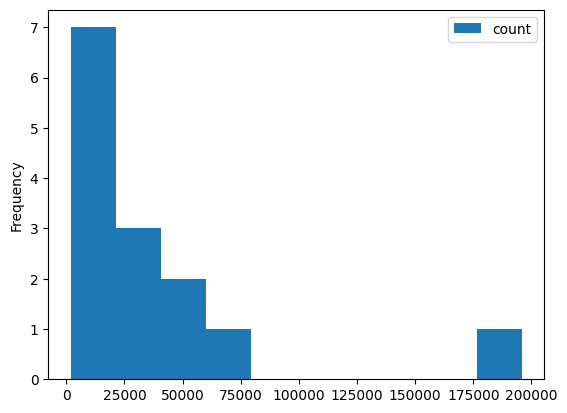

In [20]:
pd_df_june.plot(kind="hist",bins=10) # histogram plot for the count of crime type for the month of June
plt.show() # to show the graph

In [21]:
crime_june_pandas=Crime_june.groupBy("Crime type").count().orderBy("count",ascending=False).toPandas()

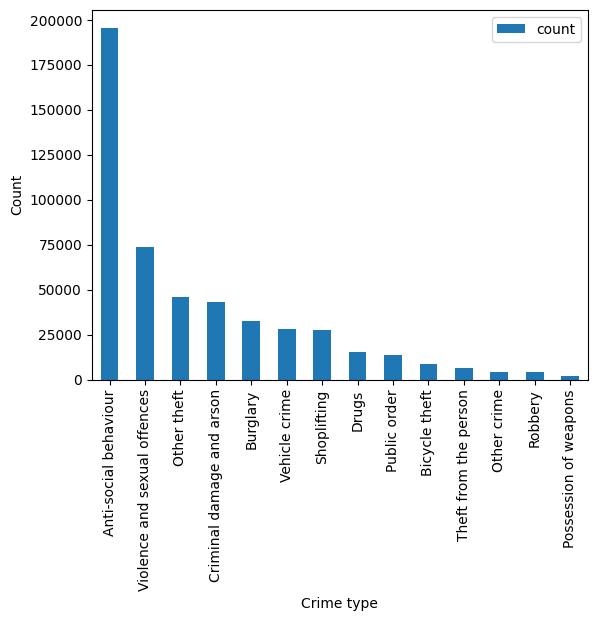

In [23]:
crime_june_pandas.plot(kind='bar', x='Crime type', y='count') # a bargraph is plotted for the distribution of crime types
plt.xlabel('Crime type')
plt.ylabel('Count')
plt.show()

In [25]:
Crime_june.groupBy("Crime type").count().orderBy("count",ascending=False).show(5) # the top 5 crime type is displayed by ordering based on the count of crime 

+--------------------+------+
|          Crime type| count|
+--------------------+------+
|Anti-social behav...|195777|
|Violence and sexu...| 73930|
|         Other theft| 46058|
|Criminal damage a...| 42935|
|            Burglary| 32546|
+--------------------+------+
only showing top 5 rows



In [26]:
pd_df_Dec=Crime_Dec.groupBy("Crime type").count().toPandas() # for December, the histogram is plotted

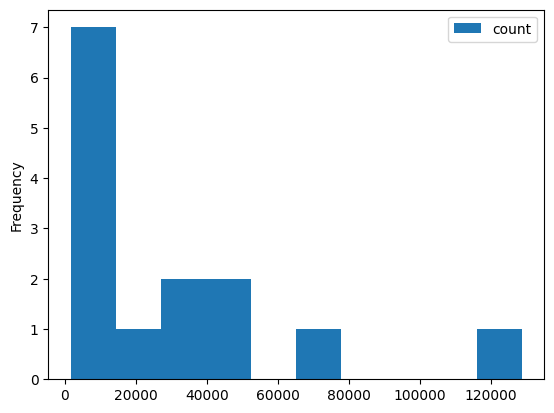

In [27]:
pd_df_Dec.plot(kind="hist",bins=10)
plt.show()

In [28]:
Crime_Dec.groupBy("Crime type").count().orderBy("count",ascending=False).show(5) # the top 5 crime type in the month of December is displayed

+--------------------+------+
|          Crime type| count|
+--------------------+------+
|Anti-social behav...|128662|
|Violence and sexu...| 74752|
|Criminal damage a...| 41313|
|         Other theft| 40583|
|            Burglary| 36263|
+--------------------+------+
only showing top 5 rows



In [29]:
crime_dec_pandas=Crime_Dec.groupBy("Crime type").count().orderBy("count",ascending=False).toPandas()

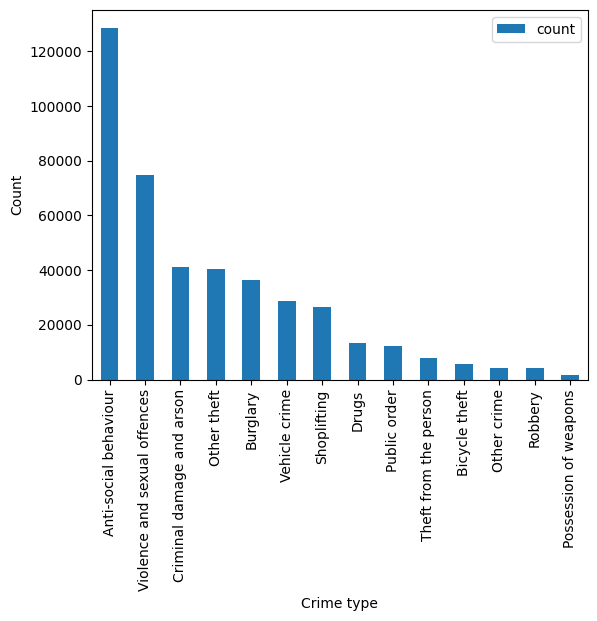

In [31]:
crime_dec_pandas.plot(kind='bar', x='Crime type', y='count') # bar graph to show the distribution of crime types for the month of December
plt.xlabel('Crime type')
plt.ylabel('Count')
plt.show()

In [32]:
Crime_june.groupBy("Last outcome category").count().orderBy("count",ascending=False).show()

+---------------------+------+
|Last outcome category| count|
+---------------------+------+
|                 null|208264|
| Investigation com...|142196|
|  Under investigation| 38234|
| Unable to prosecu...| 34974|
| Awaiting court ou...| 19441|
| Offender given a ...| 12068|
|     Local resolution|  9651|
| Offender given co...|  5868|
| Offender sent to ...|  5331|
| Offender given a ...|  4208|
|       Offender fined|  3249|
| Defendant found n...|  3171|
| Offender given co...|  2932|
| Offender given pe...|  2913|
| Formal action is ...|  2827|
| Offender given su...|  2135|
| Court case unable...|  1661|
| Suspect charged a...|  1281|
| Offender otherwis...|   527|
| Offender ordered ...|   353|
+---------------------+------+
only showing top 20 rows



In [33]:
Crime_Dec.groupBy("Last outcome category").count().orderBy("count",ascending=False).show()

+---------------------+------+
|Last outcome category| count|
+---------------------+------+
|  Under investigation|149039|
|                 null|139878|
| Investigation com...| 83632|
| Awaiting court ou...| 20526|
| Unable to prosecu...| 15667|
| Offender given a ...|  6277|
|     Local resolution|  3901|
| Offender given pe...|  1932|
| Offender given a ...|  1653|
| Formal action is ...|  1068|
| Offender sent to ...|   767|
|       Offender fined|   582|
| Offender given co...|   444|
| Offender given co...|   417|
| Suspect charged a...|   283|
| Offender given su...|   246|
| Defendant sent to...|   188|
| Court case unable...|   126|
| Defendant found n...|    57|
| Offender otherwis...|    44|
+---------------------+------+
only showing top 20 rows



In [34]:
Crime_june.groupBy("Crime type").count().agg(sum('count')).show() # the total crimes reported in the month of June

+----------+
|sum(count)|
+----------+
|    501659|
+----------+



In [36]:
Crime_Dec.groupBy("Crime type").count().agg(sum('count')).show() # the total crimes reported in the month of December

+----------+
|sum(count)|
+----------+
|    426792|
+----------+



## Join the datasets from TFL cycling open data and UK police data 

In [37]:
# get file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-26 00:38:23--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   165MB/s    in 1.3s    

2023-05-26 00:38:25 (165 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [40]:
# get the files for the month of December from the TFL data and create a dataframe total_dec_df
file001="./12a. Journey*csv"
file002="./13a. Journey*csv"
file003="./13b. Journey*csv"

total_dec_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file001,file002,file003]))
total_dec_df.show(5)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 39149324|     120|   3936|09/11/2014 00:02|          470|   Mostyn Grove, Bow|09/11/2014 00:00|            498|Bow Road Station,...|
| 39149323|     900|   4432|09/11/2014 00:15|          658|Ethelburga Estate...|09/11/2014 00:00|            723|Stephendale Road,...|
| 39149325|    3900|   9661|09/11/2014 01:05|          471|Hewison Street, O...|09/11/2014 00:00|            266|Queen's Gate (Nor...|
| 39149327|     240|  11109|09/11/2014 00:05|          758|Westbourne Park R...|09/11/2014 00:01|            151|Chepstow Villas, ...|
| 39149329|     240|   1267|09/11/2014 00:05|          

In [38]:
# get the files for the month of June from the TFL data and create a dataframe total_june_df
file004="./6. Journey*csv"
file005="./7. Journey*csv"

total_june_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file004,file005]))
total_june_df.show(5)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

#### Filtering the outliers in the Start Date columns and End Date columns for December 

In [41]:
start_df = total_dec_df.select(to_timestamp(col("Start Date"),format="dd/MM/yyyy HH:mm").alias("Start Date"),"Duration","StartStation Id","StartStation Name","End Date","EndStation Id","EndStation Name")

In [42]:
dec_df = start_df.filter(col('Start Date') >= "2014-12-01 00:00:00")

In [43]:
dec_df = start_df.filter((col('Start Date') >= "2014-12-01 00:00:00")&(col('Start Date') <"2015-01-01 00:00:00"))

In [45]:
dec_df.show(5)

+-------------------+--------+---------------+--------------------+----------------+-------------+--------------------+
|         Start Date|Duration|StartStation Id|   StartStation Name|        End Date|EndStation Id|     EndStation Name|
+-------------------+--------+---------------+--------------------+----------------+-------------+--------------------+
|2014-12-07 00:00:00|     540|            460|Burdett Road, Mil...|07/12/2014 00:09|          450|Jubilee Street, S...|
|2014-12-07 00:00:00|     720|             96|Falkirk Street, H...|07/12/2014 00:12|          234|Liverpool Road (N...|
|2014-12-07 00:00:00|     720|            301|Marylebone Lane, ...|07/12/2014 00:12|          410|Edgware Road Stat...|
|2014-12-07 00:01:00|     300|            251|Brushfield Street...|07/12/2014 00:06|          390|Buxton Street 1, ...|
|2014-12-07 00:01:00|     540|            737|Fulham Broadway, ...|07/12/2014 00:10|          644|Rainville Road, H...|
+-------------------+--------+----------

In [46]:
end_df = dec_df.select(to_timestamp(col("End Date"),format="dd/MM/yyyy HH:mm").alias("End Date"),"Duration","Start Date","StartStation Id","StartStation Name","EndStation Id","EndStation Name")

In [47]:
dec_df = end_df.filter((col("End Date") >= "2014-12-01 00:00:00") & (col("End Date") < "2015-01-01 00:00:00"))

In [48]:
dec_df.show(5)

+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|           End Date|Duration|         Start Date|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|
+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|2014-12-07 00:09:00|     540|2014-12-07 00:00:00|            460|Burdett Road, Mil...|          450|Jubilee Street, S...|
|2014-12-07 00:12:00|     720|2014-12-07 00:00:00|             96|Falkirk Street, H...|          234|Liverpool Road (N...|
|2014-12-07 00:12:00|     720|2014-12-07 00:00:00|            301|Marylebone Lane, ...|          410|Edgware Road Stat...|
|2014-12-07 00:06:00|     300|2014-12-07 00:01:00|            251|Brushfield Street...|          390|Buxton Street 1, ...|
|2014-12-07 00:10:00|     540|2014-12-07 00:01:00|            737|Fulham Broadway, ...|          644|Rainville Road, H...|
+---------------

In [49]:
# join the TFL dataset with the UK police crime records dataset for the month of December
new_dec_df = dec_df.join(Crime_Dec,on="Start Date",how="left")

In [50]:
new_dec_df.show(5)

+-------------------+-------------------+--------+---------------+--------------------+-------------+--------------------+------------+----------+---------------------+
|         Start Date|           End Date|Duration|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|Falls within|Crime type|Last outcome category|
+-------------------+-------------------+--------+---------------+--------------------+-------------+--------------------+------------+----------+---------------------+
|2014-12-07 00:00:00|2014-12-07 00:09:00|     540|            460|Burdett Road, Mil...|          450|Jubilee Street, S...|        null|      null|                 null|
|2014-12-07 00:00:00|2014-12-07 00:12:00|     720|             96|Falkirk Street, H...|          234|Liverpool Road (N...|        null|      null|                 null|
|2014-12-07 00:00:00|2014-12-07 00:12:00|     720|            301|Marylebone Lane, ...|          410|Edgware Road Stat...|        null|      null|         

In [52]:
# filtering the start date column and end date column for june month to remove the dates other than june
start_june_df = total_june_df.select(to_timestamp(col("Start Date"),format="dd/MM/yyyy HH:mm").alias("Start Date"),"Duration","StartStation Id","StartStation Name","End Date","EndStation Id","EndStation Name")

In [53]:
june_df= start_june_df.filter((col("Start Date") >= "2014-06-01 00:00:00") & (col("Start Date") < "2014-07-01 00:00:00"))

In [54]:
end_june_df = june_df.select(to_timestamp(col("End Date"),format="dd/MM/yyyy HH:mm").alias("End Date"),"Duration","Start Date","StartStation Id","StartStation Name","EndStation Id","EndStation Name")

In [55]:
june_df= end_june_df.filter((col("Start Date") >= "2014-06-01 00:00:00") & (col("Start Date") < "2014-07-01 00:00:00"))

In [57]:
june_df.show(5) # the 5 rows in the cleansed dataframe june_df is displayed

+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|           End Date|Duration|         Start Date|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|
+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|2014-06-24 00:57:00|    1080|2014-06-24 00:39:00|            311|Foley Street, Fit...|          695|Islington Green, ...|
|2014-06-25 11:40:00|     900|2014-06-25 11:25:00|            638|Falcon Road, Clap...|          430|South Parade, Che...|
|2014-06-28 07:59:00|     300|2014-06-28 07:54:00|            247|St. John's Wood C...|          121|Baker Street, Mar...|
|2014-06-25 18:59:00|     600|2014-06-25 18:49:00|            272|Baylis Road, Wate...|          199|Great Tower Stree...|
|2014-06-25 09:05:00|     660|2014-06-25 08:54:00|            199|Great Tower Stree...|          272|Baylis Road, Wate...|
+---------------

In [58]:
# join the TFL dataset with the UK police crime records dataset for the month of June
new_june_df = june_df.join(Crime_june, on="Start Date", how="left")


In [59]:
new_june_df.show(5)

+-------------------+-------------------+--------+---------------+--------------------+-------------+--------------------+------------+----------+---------------------+
|         Start Date|           End Date|Duration|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|Falls within|Crime type|Last outcome category|
+-------------------+-------------------+--------+---------------+--------------------+-------------+--------------------+------------+----------+---------------------+
|2014-06-03 13:05:00|2014-06-03 13:29:00|    1440|            239|Warren Street Sta...|          695|Islington Green, ...|        null|      null|                 null|
|2014-06-04 16:38:00|2014-06-04 16:40:00|     120|            216|Old Brompton Road...|          171|Collingham Garden...|        null|      null|                 null|
|2014-06-09 18:15:00|2014-06-09 18:31:00|     960|            695|Islington Green, ...|           20|Drummond Street ,...|        null|      null|         

In [61]:
sum = new_june_df.agg({"Duration":"sum"}).show() # sum of duration of rides for the month of June

+-------------+
|sum(Duration)|
+-------------+
|  7.1061498E9|
+-------------+



In [62]:
sum = new_dec_df.agg({"Duration":"sum"}).show() # sum of duration of rides for the month of December

+-------------+
|sum(Duration)|
+-------------+
|    6.19776E8|
+-------------+

